# Analysis of User Reviews from Metacritic 

In my notebooks titled `metacritic_host_user` and `metacritic_parasite_user`, I went through the Metacritic website (movie reviewing site) and scraped user reviews of [_The Host_](https://www.metacritic.com/movie/the-host) and [_Parasite_](https://www.metacritic.com/movie/parasite), respectively. After scraping, cleaning, and organizing the user review data for both movies, I wrote them out as JSON files so that I can run my series of analyses on the data! One important thing to note is that, once I scraped the Metacritic reviews, cleaned, organized, and took out non-English reviews, I ended up with only 71 user reviews of _The Host_ and 290 user reviews of _Parasite_ . I will discuss the implications of this further down below as we move along our analysis!

For this notebook, similar to the steps I go through in the next notebook - `analysis_user_tomatoes` - I will be going through user review data for both movies, and the overall question I'm trying to answer is: **Was _Parasite_ more well-received (higher percentage of positively rated reviews, higher sentiment scores throughout reviews) than _The Host_**? 

I will split up my analysis into 4 parts:

    1) Looking at positively, neutrally, and negatively rated reviews of each movie
    2) Using VADER to run sentiment analysis
    3) Using the NRC VAD Lexicon for sentiment analysis round 2
    4) Using the NRC Emotion Lexicon for sentiment analysis round 3

As you can see, the bulk of my project and what will help me answer my overall research question, relies on **sentiment analysis!** I'm very excited to see what results we'll end up with, and how we can better understand the public audience sentiment of both movies! 

Now, before we dive into my analyses, let's run some set-up cells:

In [1]:
import json
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
chars_to_remove = '.,!?/()'

In [3]:
%run functions.ipynb

## Analysis pt. 1: Splitting into positive and negative rated reviews

### Is there a higher percentage of positively rated reviews of _Parasite_ than that of _The Host_ ?

### Looking at user reviews of _The Host_

I'm going to load in the text data of these user reviews from Metacritic, look at how many reviews I have, and then run some analyses, including dividing the reviews by score (which was given on a scale 0-10) and also sentiment analysis.

We'll start with the Metacritic user reviews of _The Host_ before moving onto _Parasite_ !

In [4]:
metacritic_host_user = json.load(open('../data/user_reviews/metacritic_host_user.json'))

In [5]:
len(metacritic_host_user)

71

In [6]:
metacritic_host_user[0:3]

[{'date': 'Oct  5, 2009',
  'score': '5',
  'text': 'I guess the movie it self wasnt all that bad....but boy was i let down after hearing of all the "great reviews" this film was given. one review said this was "On Par with Jaws" You kidding me!!!!! I was expecting tense scary moments butI guess the movie it self wasnt all that bad....but boy was i let down after hearing of all the "great reviews" this film was given. one review said this was "On Par with Jaws" You kidding me!!!!! I was expecting tense scary moments but instead all i found my self doing when the monster appeared was casually say "o i wonder if the thing is going to take someone...." in the end if you want an okay monster movie to watch go out and rent it. Jaws i felt terrified to swim in the ocean for awhile The Host... well I think ill still brave tubing down rivers without any fear.… Expand'},
 {'date': 'Aug 20, 2009',
  'score': '0',
  'text': 'This was the worst movie I have seen in quite some time. Incredibly corn

In [7]:
# Splitting into positive and negative user reviews:

pos_host = []
neg_host = []

for review in metacritic_host_user:
    if int(review['score'])>5:
        pos_host.append(review)
    else: 
        neg_host.append(review)   
        
        

In [8]:
pos_host[:3]

[{'date': 'Aug  8, 2009',
  'score': '8',
  'text': "This isn't exactly a masterpiece, but it is an entertaining Korean monster flick. This film is certainly not scary, but the monster scenes are rather riveting and cool. The music is fantastic and very well done and fits very well. The This isn't exactly a masterpiece, but it is an entertaining Korean monster flick. This film is certainly not scary, but the monster scenes are rather riveting and cool. The music is fantastic and very well done and fits very well. The film also has a fun sense of humor, even if at times, it is unintentional. This is a very entertaining film that is worthy of owning and enjoying for any fan of monster films. Just remember, when you get it, put the language in Korean, the English voice-overs are terrible and will ruin the film if you watch it like that.… Expand"},
 {'date': 'Feb 13, 2009',
  'score': '6',
  'text': 'To put it simply; sickening, overrated, chilling, deathly, yet captivating at the same tim

In [9]:
neg_host[:3]

[{'date': 'Oct  5, 2009',
  'score': '5',
  'text': 'I guess the movie it self wasnt all that bad....but boy was i let down after hearing of all the "great reviews" this film was given. one review said this was "On Par with Jaws" You kidding me!!!!! I was expecting tense scary moments butI guess the movie it self wasnt all that bad....but boy was i let down after hearing of all the "great reviews" this film was given. one review said this was "On Par with Jaws" You kidding me!!!!! I was expecting tense scary moments but instead all i found my self doing when the monster appeared was casually say "o i wonder if the thing is going to take someone...." in the end if you want an okay monster movie to watch go out and rent it. Jaws i felt terrified to swim in the ocean for awhile The Host... well I think ill still brave tubing down rivers without any fear.… Expand'},
 {'date': 'Aug 20, 2009',
  'score': '0',
  'text': 'This was the worst movie I have seen in quite some time. Incredibly corn

In [10]:
len(pos_host)

33

In [11]:
len(neg_host)

38

In [12]:
len(pos_host) / len(metacritic_host_user)

0.4647887323943662

In [13]:
len(neg_host) / len(metacritic_host_user)

0.5352112676056338

### Observations

* For Metacritic user reviews of _The Host_ there are actually more negative reviews than positive ones. 
* 53.5% of reviews were negative, versus 46.5% positive! 
* It'll be intriguing to see what the separation between pos and neg is for user reviews of _Parasite_ and we'll look at that next

### Looking at user reviews of _Parasite_

Now I want to look at splitting positive and negative rated user reviews of _Parasite_ just like we did above!

In [14]:
metacritic_parasite_user = json.load(open('../data/user_reviews/metacritic_parasite_user.json'))

In [15]:
len(metacritic_parasite_user)

290

In [16]:
metacritic_parasite_user[:3]

[{'date': 'Apr 30, 2021',
  'score': '10',
  'text': 'Director {Bong Joon-Ho} has done it again with a captivating and extraordinary film. Leaving me questioning if the real world is actually like this! Not only is the climax risen to a new level but the jaw dropping ending left me shook.'},
 {'date': 'Apr 29, 2021',
  'score': '10',
  'text': 'phenomenal, involves all genres of cinema, and in a fantastic way; like I’ve never seen before.'},
 {'date': 'Apr 20, 2021',
  'score': '9',
  'text': "This review contains spoilers, click expand to view.\n        \nNormally I'm not much into Korean entertainment. The only Korean entertainment I have ever consumed is PUBG. So I didn't know what to expect when I begun watching this film. I saw it with a blank slate, with no preformed opinion whatsoever. The only time I had seen a Korean film before was The Train to Busan, and that too is made by Bong Joon-Ho. I had watched it from somewhere in the middle when it was coming on TV. So in a way we c

In [17]:
# Splitting into pos and neg rated reviews:

pos_parasite = []
neg_parasite = []

for review in metacritic_parasite_user:
    if int(review['score']) > 5:
        pos_parasite.append(review)
    else:
        neg_parasite.append(review)

In [18]:
len(pos_parasite)

256

In [19]:
len(neg_parasite)

34

In [20]:
len(pos_parasite) / len(metacritic_parasite_user)

0.8827586206896552

In [21]:
len(neg_parasite) / len(metacritic_parasite_user)

0.11724137931034483

Wow, that's an overwhelmingly huge difference.
* For reviews of _Parasite_ about 88.3% of them are positive vs. 11.7% negative
* This tells us that **Yes, Parasite received a higher percentage of positive reviews than The Host** 

## Analysis pt. 2: Using VADER for sentiment analysis

### For user reviews of The Host 

Initializing and using VADER for sentiment analysis on the user reviews for each movie, starting with The Host

In [22]:
sid = SentimentIntensityAnalyzer()

In [23]:
sid.polarity_scores('monster scary')

{'compound': -0.4939, 'neg': 0.762, 'neu': 0.238, 'pos': 0.0}

When you check through the scores, validity check is the 'neu' score (if it's near 1 then it's not in the dictionary)

Before I initialize using VADER for analysis, in which I'll tokenize the text and VADER will go through and score each word, I want to create a list of stop words that I do NOT want VADER to score. This is because there are words that are not about the reviewer's opinion, sentiment, or subjective thoughts, but rather about the plot of the movie or certain film characteristics. 

Here's the list of words I do NOT want VADER to analyze (and this will remain the same for all the other review data where I'm running SA):

In [24]:
words_to_remove = ['monster','virus','expand','host','movie','kill','Expand','parasite','movie','sucks',
    'poor','struggles','hard','horror','military','government','black','shot','violent','violence','warfare',
    'money', 'poverty','inequality','foreign','hype','creature','mutant','beast','lower','mother','waste']

Initializing and using VADER for sentiment analysis on the user reviews:

In [25]:
for review in metacritic_host_user:
    tokens = tokenize(review['text'], lowercase=True, strip_chars=chars_to_remove)
    filtered_tokens = [t for t in tokens if t not in words_to_remove]
    review['tokens']=filtered_tokens

In [26]:
metacritic_host_user[:5]

[{'date': 'Oct  5, 2009',
  'score': '5',
  'text': 'I guess the movie it self wasnt all that bad....but boy was i let down after hearing of all the "great reviews" this film was given. one review said this was "On Par with Jaws" You kidding me!!!!! I was expecting tense scary moments butI guess the movie it self wasnt all that bad....but boy was i let down after hearing of all the "great reviews" this film was given. one review said this was "On Par with Jaws" You kidding me!!!!! I was expecting tense scary moments but instead all i found my self doing when the monster appeared was casually say "o i wonder if the thing is going to take someone...." in the end if you want an okay monster movie to watch go out and rent it. Jaws i felt terrified to swim in the ocean for awhile The Host... well I think ill still brave tubing down rivers without any fear.… Expand',
  'tokens': ['i',
   'guess',
   'the',
   'it',
   'self',
   'wasnt',
   'all',
   'that',
   'badbut',
   'boy',
   'was',


In [27]:
for review in metacritic_host_user:
    text = ' '.join(review['tokens'])
    scores = sid.polarity_scores(text)
    review.update(scores)

In [28]:
text

'two days ago i saw "300" yesterday i saw "the host" which one did i like the best the and judging from the audience reactions i was not alone this film breaks all the rules and has fun doing it it doesn\'t have the two days ago i saw "300" yesterday i saw "the host" which one did i like the best the and judging from the audience reactions i was not alone this film breaks all the rules and has fun doing it it doesn\'t have the brooding suspensful music barely lit scenes buckets of blood and dismemberments of most movies and maybe thats why it worked so well if you don\'t mind subtitles and you like movies the old fashioned kind where the is not a psycho killer then go you will not be disappointed…'

In [29]:
metacritic_host_user[:5]

[{'compound': 0.2023,
  'date': 'Oct  5, 2009',
  'neg': 0.103,
  'neu': 0.771,
  'pos': 0.126,
  'score': '5',
  'text': 'I guess the movie it self wasnt all that bad....but boy was i let down after hearing of all the "great reviews" this film was given. one review said this was "On Par with Jaws" You kidding me!!!!! I was expecting tense scary moments butI guess the movie it self wasnt all that bad....but boy was i let down after hearing of all the "great reviews" this film was given. one review said this was "On Par with Jaws" You kidding me!!!!! I was expecting tense scary moments but instead all i found my self doing when the monster appeared was casually say "o i wonder if the thing is going to take someone...." in the end if you want an okay monster movie to watch go out and rent it. Jaws i felt terrified to swim in the ocean for awhile The Host... well I think ill still brave tubing down rivers without any fear.… Expand',
  'tokens': ['i',
   'guess',
   'the',
   'it',
   'sel

In [30]:
# Adding a key-value pair into the dict for average token sentiment scores for each review:
for review in metacritic_host_user:
    avg = sum([sid.lexicon.get(tok.lower(),0) for tok in review['tokens']])/len(metacritic_host_user)
    review['average'] = avg

In [31]:
metacritic_host_user[0]

{'average': -0.08169014084507044,
 'compound': 0.2023,
 'date': 'Oct  5, 2009',
 'neg': 0.103,
 'neu': 0.771,
 'pos': 0.126,
 'score': '5',
 'text': 'I guess the movie it self wasnt all that bad....but boy was i let down after hearing of all the "great reviews" this film was given. one review said this was "On Par with Jaws" You kidding me!!!!! I was expecting tense scary moments butI guess the movie it self wasnt all that bad....but boy was i let down after hearing of all the "great reviews" this film was given. one review said this was "On Par with Jaws" You kidding me!!!!! I was expecting tense scary moments but instead all i found my self doing when the monster appeared was casually say "o i wonder if the thing is going to take someone...." in the end if you want an okay monster movie to watch go out and rent it. Jaws i felt terrified to swim in the ocean for awhile The Host... well I think ill still brave tubing down rivers without any fear.… Expand',
 'tokens': ['i',
  'guess',
 

In [32]:
len(metacritic_host_user)

71

Now I have the pos, neg, neu scores and also the compound sentiment scores for each item in my list of reviews!

### Doing the same type of sentiment analysis using VADER for user reviews of _Parasite_

In [33]:
metacritic_parasite_user[0]

{'date': 'Apr 30, 2021',
 'score': '10',
 'text': 'Director {Bong Joon-Ho} has done it again with a captivating and extraordinary film. Leaving me questioning if the real world is actually like this! Not only is the climax risen to a new level but the jaw dropping ending left me shook.'}

In [34]:
len(metacritic_parasite_user)

290

In [35]:
sid.polarity_scores('hideous')

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [36]:
sid.polarity_scores('shook')

{'compound': -0.1027, 'neg': 1.0, 'neu': 0.0, 'pos': 0.0}

In [37]:
for review in metacritic_parasite_user:
    tokens = tokenize(review['text'], lowercase=True, strip_chars=chars_to_remove)
    filtered_tokens = [t for t in tokens if t not in words_to_remove]
    review['tokens']=filtered_tokens

In [38]:
metacritic_parasite_user[:10]

[{'date': 'Apr 30, 2021',
  'score': '10',
  'text': 'Director {Bong Joon-Ho} has done it again with a captivating and extraordinary film. Leaving me questioning if the real world is actually like this! Not only is the climax risen to a new level but the jaw dropping ending left me shook.',
  'tokens': ['director',
   '{bong',
   'joon-ho}',
   'has',
   'done',
   'it',
   'again',
   'with',
   'a',
   'captivating',
   'and',
   'extraordinary',
   'film',
   'leaving',
   'me',
   'questioning',
   'if',
   'the',
   'real',
   'world',
   'is',
   'actually',
   'like',
   'this',
   'not',
   'only',
   'is',
   'the',
   'climax',
   'risen',
   'to',
   'a',
   'new',
   'level',
   'but',
   'the',
   'jaw',
   'dropping',
   'ending',
   'left',
   'me',
   'shook']},
 {'date': 'Apr 29, 2021',
  'score': '10',
  'text': 'phenomenal, involves all genres of cinema, and in a fantastic way; like I’ve never seen before.',
  'tokens': ['phenomenal',
   'involves',
   'all',
   'gen

In [39]:
for review in metacritic_parasite_user:
    text = ' '.join(review['tokens'])
    scores = sid.polarity_scores(text)
    review.update(scores)

In [40]:
metacritic_parasite_user[90]

{'compound': 0.0772,
 'date': 'Mar 27, 2020',
 'neg': 0.0,
 'neu': 0.874,
 'pos': 0.126,
 'score': '10',
 'text': 'Groundbreaking and genre-defying, Parasite is undoubtedly a integral landmark in cinema history.',
 'tokens': ['groundbreaking',
  'and',
  'genre-defying',
  'is',
  'undoubtedly',
  'a',
  'integral',
  'landmark',
  'in',
  'cinema',
  'history']}

In [41]:
metacritic_parasite_user[:10]

[{'compound': -0.0129,
  'date': 'Apr 30, 2021',
  'neg': 0.067,
  'neu': 0.89,
  'pos': 0.042,
  'score': '10',
  'text': 'Director {Bong Joon-Ho} has done it again with a captivating and extraordinary film. Leaving me questioning if the real world is actually like this! Not only is the climax risen to a new level but the jaw dropping ending left me shook.',
  'tokens': ['director',
   '{bong',
   'joon-ho}',
   'has',
   'done',
   'it',
   'again',
   'with',
   'a',
   'captivating',
   'and',
   'extraordinary',
   'film',
   'leaving',
   'me',
   'questioning',
   'if',
   'the',
   'real',
   'world',
   'is',
   'actually',
   'like',
   'this',
   'not',
   'only',
   'is',
   'the',
   'climax',
   'risen',
   'to',
   'a',
   'new',
   'level',
   'but',
   'the',
   'jaw',
   'dropping',
   'ending',
   'left',
   'me',
   'shook']},
 {'compound': 0.7269,
  'date': 'Apr 29, 2021',
  'neg': 0.0,
  'neu': 0.681,
  'pos': 0.319,
  'score': '10',
  'text': 'phenomenal, involve

Adding a key-value pair into the dict for average token sentiment scores for each review:

In [42]:
for review in metacritic_parasite_user:
    avg = sum([sid.lexicon.get(tok.lower(),0) for tok in review['tokens']])/len(metacritic_parasite_user)
    review['average'] = avg

In [43]:
metacritic_parasite_user[5]

{'average': 0.07,
 'compound': 0.9823,
 'date': 'Mar 28, 2021',
 'neg': 0.0,
 'neu': 0.754,
 'pos': 0.246,
 'score': '10',
 'text': 'A stark, unapologetic, Hitchcockian, and engrossing film about 2 families and their differences in their respective social classes. As the director states, the film is best experienced fresh. Therefore nothing more than my recommendation ofA stark, unapologetic, Hitchcockian, and engrossing film about 2 families and their differences in their respective social classes. As the director states, the film is best experienced fresh. Therefore nothing more than my recommendation of the film will be made. It is absolutely, must-see cinema and will forever (aside from its incredible cultural impact) inspire film-makers and screenwriters. A true master class of film-making at play here and the easiest 10/10 I can give.… Expand',
 'tokens': ['a',
  'stark',
  'unapologetic',
  'hitchcockian',
  'and',
  'engrossing',
  'film',
  'about',
  '2',
  'families',
  'and

In [44]:
print(len(metacritic_host_user))
print(len(metacritic_parasite_user))

71
290


Now that we have the sentiment scores and info for both lists of reviews, we can compare the sentiment between the reviews of each movie by taking the average compound scores of each list:

Mean compound sentiment score for Metacritic user reviews of _The Host_

In [45]:
sum([review['compound'] for review in metacritic_host_user])/ len(metacritic_host_user)

0.19426478873239433

Mean compound sentiment score for Metacritic user reviews of _Parasite_

In [46]:
sum([review['compound'] for review in metacritic_parasite_user])/ len(metacritic_parasite_user)

0.6536537931034481

This tells us that **Yes, user reviews of Parasite have higher sentiment scores (more positive sentiment) than that of The Host**

In [47]:
host_cs = [review['compound'] for review in metacritic_host_user]
parasite_cs = [review['compound'] for review in metacritic_parasite_user]

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:>

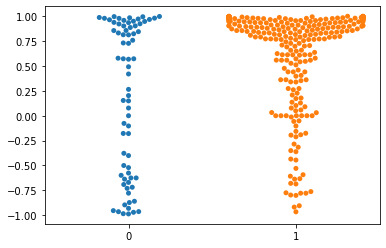

In [48]:
sns.swarmplot(data=[host_cs, parasite_cs])


<AxesSubplot:>

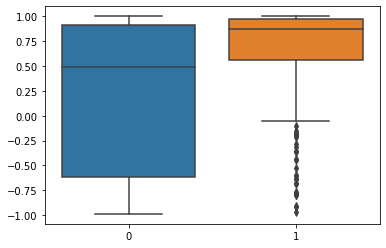

In [49]:
sns.boxplot(data=[host_cs, parasite_cs])


<AxesSubplot:>

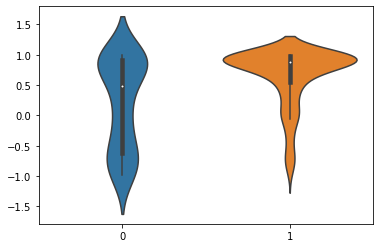

In [50]:
sns.violinplot(data=[host_cs, parasite_cs])


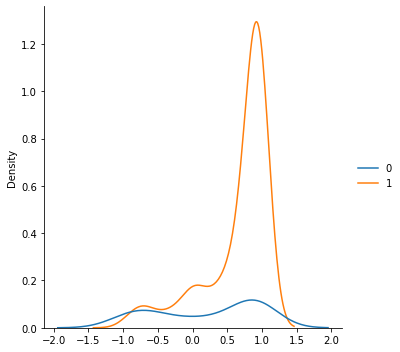

In [51]:
sns.displot(data=[host_cs, parasite_cs], kind='kde')


Observations: 
* Higher mean compound sentiment scores among reviews of _Parasite_ than among reviews of _The Host_
* Boxplot and swarmplot: wider variation for user reviews of _The Host_
* Note the wider discrepancy in text data size, not really useful for making valid comparisons since it's 71 reviews of The Host vs. 290 of Parasite

Since it's better to use multiple tools to test my hypothesis that Parasite received higher sentiment (positive) reviews than The Host, let's now move on to our third analysis:

## Analysis pt. 3: Using NRC lexicon for sentiment analysis

### NRC VAD Lexicon

* VAD = Valence Arousal Dominance

Words play a central role in language and thought. Several influential factor analysis studies have shown that the primary dimensions of word meaning are valence, arousal, and dominance (VAD) (Osgood et al., 1957; Russell, 1980, 2003).

* **valence** is the positive--negative or pleasure--displeasure dimension;
* **arousal** is the excited--calm or active--passive dimension; and
* **dominance** is the powerful--weak or 'have full control'--'have no control' dimension.

The NRC Valence, Arousal, and Dominance (VAD) Lexicon includes a list of more than 20,000 English words and their valence, arousal, and dominance scores. For a given word and a dimension (V/A/D), the scores range from 0 (lowest V/A/D) to 1 (highest V/A/D). The lexicon with its fine-grained real-valued scores was created by manual annotation using Best--Worst Scaling. The lexicon is markedly larger than any of the existing VAD lexicons. We also show that the ratings obtained are substantially more reliable than those in existing lexicons. (See associated paper for details.)

In [52]:
NRC_VAD_lexicon = open('../data/lexicons/NRC-VAD-Lexicon.txt').readlines()

In [53]:
len(NRC_VAD_lexicon)

20008

In [54]:
for line in NRC_VAD_lexicon[:20]:
    print(line.strip())

Word	Valence	Arousal	Dominance
aaaaaaah	0.479	0.606	0.291
aaaah	0.520	0.636	0.282
aardvark	0.427	0.490	0.437
aback	0.385	0.407	0.288
abacus	0.510	0.276	0.485
abalone	0.500	0.480	0.412
abandon	0.052	0.519	0.245
abandoned	0.046	0.481	0.130
abandonment	0.128	0.430	0.202
abashed	0.177	0.644	0.307
abate	0.255	0.696	0.604
abatement	0.388	0.338	0.336
abba	0.562	0.500	0.480
abbey	0.580	0.367	0.444
abbot	0.427	0.321	0.483
abbreviate	0.531	0.375	0.330
abbreviation	0.469	0.306	0.345
abdomen	0.469	0.462	0.471
abdominal	0.490	0.456	0.445


Creating a dictionary from the text file to make it easier to work with: 

In [55]:
NRC_VAD = {}

# first line in list is the header so slice from second item in list
for line in NRC_VAD_lexicon[1:]:  
    word, V,A,D = line.strip().split('\t')
    NRC_VAD[word] = {'V': float(V), 
                     'A': float(A),
                     'D': float(D)}
    

In [56]:
# Example:
NRC_VAD['surprised']

{'A': 0.855, 'D': 0.539, 'V': 0.784}

In [57]:
NRC_VAD['surprised']['D']

0.539

In [58]:
NRC_VAD['kill']

{'A': 0.941, 'D': 0.736, 'V': 0.052}

Writing a function to use NRC VAD and go through each review to process it:

In [59]:
def process_review(review):
    
    tokens = tokenize(review['text'], lowercase=True, strip_chars=chars_to_remove)
    filtered_tokens = [t for t in tokens if t not in words_to_remove]
    review['tokens']=filtered_tokens
    
    
    review['Valence']=0
    review['Dominance']=0
    review['Arousal']=0
    
    review['VAD_toks']=[]
    
    for token in filtered_tokens:
        if token in NRC_VAD.keys():
            scores = NRC_VAD[token]
            scores['tok']=token
            
            review['Valence']+=scores['V']
            review['Arousal']+=scores['A']
            review['Dominance']+=scores['D']
            
            review['VAD_toks'].append(scores)
            
    for dimension in ('Valence', 'Arousal', 'Dominance'):
        if len(review['VAD_toks'])>0:
            review[dimension] /= len(review['VAD_toks'])

### Processing each review using the NRC VAD for Metacritic user reviews of _The Host_

In [60]:
for review in metacritic_host_user:
    process_review(review)

In [61]:
metacritic_host_user[:2]

[{'Arousal': 0.45847999999999983,
  'Dominance': 0.4662999999999999,
  'VAD_toks': [{'A': 0.463, 'D': 0.442, 'V': 0.64, 'tok': 'guess'},
   {'A': 0.37, 'D': 0.5, 'V': 0.704, 'tok': 'self'},
   {'A': 0.392, 'D': 0.445, 'V': 0.646, 'tok': 'boy'},
   {'A': 0.373, 'D': 0.307, 'V': 0.427, 'tok': 'let'},
   {'A': 0.33, 'D': 0.264, 'V': 0.208, 'tok': 'down'},
   {'A': 0.49, 'D': 0.595, 'V': 0.669, 'tok': 'hearing'},
   {'A': 0.491, 'D': 0.566, 'V': 0.823, 'tok': 'film'},
   {'A': 0.292, 'D': 0.37, 'V': 0.542, 'tok': 'one'},
   {'A': 0.408, 'D': 0.636, 'V': 0.667, 'tok': 'review'},
   {'A': 0.372, 'D': 0.429, 'V': 0.615, 'tok': 'par'},
   {'A': 0.625, 'D': 0.457, 'V': 0.622, 'tok': 'kidding'},
   {'A': 0.45, 'D': 0.302, 'V': 0.561, 'tok': 'expecting'},
   {'A': 0.439, 'D': 0.655, 'V': 0.396, 'tok': 'tense'},
   {'A': 0.952, 'D': 0.528, 'V': 0.062, 'tok': 'scary'},
   {'A': 0.463, 'D': 0.442, 'V': 0.64, 'tok': 'guess'},
   {'A': 0.37, 'D': 0.5, 'V': 0.704, 'tok': 'self'},
   {'A': 0.392, 'D': 0

Now I can use NRC VAD for SA. Let's do the same thing for the other movie:

### Processing each review using the NRC VAD for Metacritic user reviews of _Parasite_

In [62]:
for review in metacritic_parasite_user:
    process_review(review)

In [63]:
metacritic_parasite_user[0]

{'Arousal': 0.5319999999999999,
 'Dominance': 0.5918125000000001,
 'VAD_toks': [{'A': 0.58, 'D': 0.912, 'V': 0.688, 'tok': 'director'},
  {'A': 0.594, 'D': 0.816, 'V': 0.895, 'tok': 'captivating'},
  {'A': 0.728, 'D': 0.86, 'V': 0.969, 'tok': 'extraordinary'},
  {'A': 0.491, 'D': 0.566, 'V': 0.823, 'tok': 'film'},
  {'A': 0.542, 'D': 0.371, 'V': 0.163, 'tok': 'leaving'},
  {'A': 0.696, 'D': 0.509, 'V': 0.438, 'tok': 'questioning'},
  {'A': 0.51, 'D': 0.717, 'V': 0.719, 'tok': 'real'},
  {'A': 0.394, 'D': 0.75, 'V': 0.622, 'tok': 'world'},
  {'A': 0.353, 'D': 0.446, 'V': 0.719, 'tok': 'like'},
  {'A': 0.853, 'D': 0.667, 'V': 0.735, 'tok': 'climax'},
  {'A': 0.49, 'D': 0.582, 'V': 0.917, 'tok': 'new'},
  {'A': 0.277, 'D': 0.491, 'V': 0.622, 'tok': 'level'},
  {'A': 0.51, 'D': 0.42, 'V': 0.5, 'tok': 'jaw'},
  {'A': 0.365, 'D': 0.492, 'V': 0.344, 'tok': 'ending'},
  {'A': 0.37, 'D': 0.361, 'V': 0.354, 'tok': 'left'},
  {'A': 0.759, 'D': 0.509, 'V': 0.163, 'tok': 'shook'}],
 'Valence': 0.60

NRC VAD tells us the valence, arousal, and dominance scores, but if we want to get a better sense of the overall emotions and sentiment of the reviews, we could use NRC Emotion Lexicon to gain insights about whether there are specific emotion categories that are more prevalent across reviews of one movie or the other. We can also use NRC EmoLex to determine which words driving each emotion category:

## Analysis pt. 4: Using NRC Emotion Lexicon for sentiment analysis

In [64]:
NRC_emolex = json.load(open('../data/lexicons/NRC_emotion_lexicon.json'))


NRC EmoLex has 10 categories, divided into 8 emotions (trust, fear, sadness, anger, surprise, disgust, joy, anticipation) and 2 sentiments (positive, negative). Here are the keys:

In [65]:
NRC_emolex.keys()


dict_keys(['trust', 'fear', 'negative', 'sadness', 'anger', 'surprise', 'positive', 'disgust', 'joy', 'anticipation'])

Looking at examples of words that fall under 2 categories: `fear` and `joy`:

In [66]:
NRC_emolex['fear'][:20]


['abandon',
 'abandoned',
 'abandonment',
 'abduction',
 'abhor',
 'abhorrent',
 'abominable',
 'abomination',
 'abortion',
 'absence',
 'abuse',
 'abyss',
 'accident',
 'accidental',
 'accursed',
 'accused',
 'accuser',
 'accusing',
 'acrobat',
 'adder']

In [67]:
NRC_emolex['joy'][:20]

['absolution',
 'abundance',
 'abundant',
 'accolade',
 'accompaniment',
 'accomplish',
 'accomplished',
 'achieve',
 'achievement',
 'acrobat',
 'admirable',
 'admiration',
 'adorable',
 'adoration',
 'adore',
 'advance',
 'advent',
 'advocacy',
 'aesthetics',
 'affection']

Writing a function to go through each review and determine if each token goes into a specific EmoLex category:

In [68]:
def score_emotion(review, emolex=NRC_emolex):

    if not review.get('tokens'):
        tokens = tokenize(review['text'], lowercase=True, strip_chars=chars_to_remove)
        filtered_tokens = [t for t in tokens if t not in words_to_remove]
        review['tokens']=filtered_tokens
        
    for emotion, words in emolex.items():
        review[emotion] = [t for t in review['tokens'] if t in words]

### Scoring user reviews of _The Host_ with the NRC emotion lexicon

In [69]:
# score all reviews with NRC emotion lexicon
for r in metacritic_host_user:
    score_emotion(r)
    

In [70]:
metacritic_host_user[10]


{'Arousal': 0.5543333333333335,
 'Dominance': 0.5668333333333333,
 'VAD_toks': [{'A': 0.843, 'D': 0.667, 'V': 0.918, 'tok': 'fun'},
  {'A': 0.616, 'D': 0.665, 'V': 0.906, 'tok': 'humorous'},
  {'A': 0.491, 'D': 0.566, 'V': 0.823, 'tok': 'film'},
  {'A': 0.382, 'D': 0.441, 'V': 0.408, 'tok': 'must'},
  {'A': 0.269, 'D': 0.312, 'V': 0.635, 'tok': 'see'},
  {'A': 0.725, 'D': 0.75, 'V': 0.959, 'tok': 'enjoy'}],
 'Valence': 0.7748333333333334,
 'anger': [],
 'anticipation': ['fun', 'enjoy'],
 'average': 0.08591549295774648,
 'compound': 0.8442,
 'date': 'Jan 22, 2008',
 'disgust': [],
 'fear': [],
 'joy': ['fun', 'humorous', 'enjoy'],
 'neg': 0.0,
 'negative': [],
 'neu': 0.497,
 'pos': 0.503,
 'positive': ['fun', 'humorous', 'enjoy'],
 'sadness': [],
 'score': '10',
 'surprise': [],
 'text': 'Fun, action-filled, humorous film. A must see for those who enjoy Asian films.',
 'tokens': ['fun',
  'action-filled',
  'humorous',
  'film',
  'a',
  'must',
  'see',
  'for',
  'those',
  'who',
  

* After scoring each review with VADER, NRC VAD and NRC emotion I can create frequency lists of words that are scored by each.

* Here we could build frequency list of all the words in the emotion lexicon categories, e.g. *trust*, *fear*, *surprise*, etc.

In [71]:
# set up a dictionary of Counters
# key = emotion category value = Counter
emotion_dist_host = {}
for emo in NRC_emolex:
    emotion_dist_host[emo] = Counter()
    

* Loop over each review and update the counters

In [72]:
for review in metacritic_host_user:
    for emo in NRC_emolex:
        emotion_dist_host[emo].update(review[emo])
        

* look at the top 20 words in the *anger* category across the reviews

In [73]:
emotion_dist_host['anger'].most_common(20)


[('bad', 18),
 ('terrible', 11),
 ('wasted', 5),
 ('horrible', 4),
 ('fits', 2),
 ('failing', 2),
 ('insult', 2),
 ('hell', 2),
 ('painful', 2),
 ('cash', 2),
 ('lie', 2),
 ('ill', 1),
 ('sickening', 1),
 ('shit', 1),
 ('intense', 1),
 ('idiocy', 1),
 ('disaster', 1),
 ('disparity', 1),
 ('offend', 1),
 ('jerk', 1)]

Looks like many of these `anger` words in the reviews are derogatory, it'll be fascinating to compare these words with that of `anger` words in reviews of Parasite.

Now looking at:

* *positive* words

In [74]:
emotion_dist_host['positive'].most_common(20)


[('good', 29),
 ('masterpiece', 8),
 ('sense', 7),
 ('fun', 6),
 ('culture', 5),
 ('found', 4),
 ('pretty', 4),
 ('completely', 4),
 ('kind', 4),
 ('solid', 4),
 ('worth', 4),
 ('enjoy', 4),
 ('special', 4),
 ('reason', 4),
 ('hilarious', 4),
 ('engaging', 4),
 ('praise', 4),
 ('crucial', 4),
 ('level', 4),
 ('entertaining', 3)]

* *negative* words

In [75]:
emotion_dist_host['negative'].most_common(20)

[('bad', 18),
 ('terrible', 11),
 ('boring', 5),
 ('wasted', 5),
 ('silly', 5),
 ('leave', 4),
 ('mediocre', 4),
 ('horrible', 4),
 ('problem', 4),
 ('ruin', 3),
 ('case', 3),
 ('mess', 3),
 ('highest', 3),
 ('critic', 3),
 ('fault', 3),
 ('disappointment', 3),
 ('boy', 2),
 ('hearing', 2),
 ('fits', 2),
 ('whore', 2)]

In [76]:
emotion_dist_host['joy'].most_common(20)

[('good', 29),
 ('masterpiece', 8),
 ('fun', 6),
 ('silly', 5),
 ('found', 4),
 ('pretty', 4),
 ('kind', 4),
 ('enjoy', 4),
 ('special', 4),
 ('hilarious', 4),
 ('engaging', 4),
 ('praise', 4),
 ('entertaining', 3),
 ('music', 3),
 ('excellent', 3),
 ('true', 3),
 ('highest', 3),
 ('thrilling', 3),
 ('sunshine', 3),
 ('perfect', 2)]

In [77]:
emotion_dist_host['trust'].most_common(20)

[('good', 29),
 ('found', 4),
 ('pretty', 4),
 ('kind', 4),
 ('enjoy', 4),
 ('engaging', 4),
 ('praise', 4),
 ('crucial', 4),
 ('level', 4),
 ('real', 3),
 ('excellent', 3),
 ('true', 3),
 ('top', 3),
 ('translation', 3),
 ('fully', 3),
 ('school', 3),
 ('perfect', 2),
 ('save', 2),
 ('professional', 2),
 ('remarkable', 2)]

This gives us an idea of what kinds of words are driving certain sentiment/emotion in the reviews. 
* `joy` is driven by words like good, masterpiece, entertaining, engaging, etc.
* words like kind, praise, crucial, excellent go in the `trust` category
* important to note that we can see the limitations of NRC EmoLex since one word can exist across multiple categories: `excellent`, for instance, occurs under the `joy` and `trust` categories

### Scoring user reviews of _Parasite_ with the NRC emotion lexicon, same as above

In [78]:
for r in metacritic_parasite_user:
    score_emotion(r)

In [79]:
metacritic_parasite_user[2]

{'Arousal': 0.4489847328244274,
 'Dominance': 0.5311679389312977,
 'VAD_toks': [{'A': 0.408, 'D': 0.636, 'V': 0.667, 'tok': 'review'},
  {'A': 0.365, 'D': 0.268, 'V': 0.536, 'tok': 'click'},
  {'A': 0.292, 'D': 0.555, 'V': 0.896, 'tok': 'view'},
  {'A': 0.75, 'D': 0.569, 'V': 0.847, 'tok': 'entertainment'},
  {'A': 0.75, 'D': 0.569, 'V': 0.847, 'tok': 'entertainment'},
  {'A': 0.389, 'D': 0.593, 'V': 0.757, 'tok': 'have'},
  {'A': 0.361, 'D': 0.704, 'V': 0.765, 'tok': 'know'},
  {'A': 0.327, 'D': 0.377, 'V': 0.469, 'tok': 'expect'},
  {'A': 0.5, 'D': 0.404, 'V': 0.677, 'tok': 'begun'},
  {'A': 0.491, 'D': 0.566, 'V': 0.823, 'tok': 'film'},
  {'A': 0.541, 'D': 0.518, 'V': 0.316, 'tok': 'saw'},
  {'A': 0.229, 'D': 0.25, 'V': 0.531, 'tok': 'blank'},
  {'A': 0.283, 'D': 0.431, 'V': 0.531, 'tok': 'slate'},
  {'A': 0.482, 'D': 0.638, 'V': 0.594, 'tok': 'opinion'},
  {'A': 0.314, 'D': 0.302, 'V': 0.4, 'tok': 'whatsoever'},
  {'A': 0.288, 'D': 0.609, 'V': 0.604, 'tok': 'time'},
  {'A': 0.491, 

Same thing with the reviews of _Parasite_ :

In [80]:
# set up a dictionary of Counters
# key = emotion category value = Counter
emotion_dist_parasite = {}
for emo in NRC_emolex:
    emotion_dist_parasite[emo] = Counter()
    

In [81]:
for review in metacritic_parasite_user:
    for emo in NRC_emolex:
        emotion_dist_parasite[emo].update(review[emo])
        

In [82]:
emotion_dist_parasite['negative'].most_common(20)

[('unexpected', 14),
 ('leave', 13),
 ('unpredictable', 12),
 ('bad', 10),
 ('struggle', 10),
 ('smell', 7),
 ('small', 7),
 ('doubt', 6),
 ('stupid', 6),
 ('words', 6),
 ('provoking', 6),
 ('boring', 6),
 ('cry', 6),
 ('case', 6),
 ('spoil', 5),
 ('crazy', 5),
 ('grounded', 5),
 ('outstanding', 5),
 ('missing', 5),
 ('absurd', 5)]

* note that `foreign` is under the negative sentiment category, probably because the meaning is a little different from what's actually used in the review: foreign can mean something distant or unfamiliar, or in this case, foreign film just means non-American
* we can also see that these negative words aren't all very derogatory about the movie, words like `unexpected`, `struggle`, `doubt`, and `violent` are not necessarily very negative sentiment about the movie

In [83]:
emotion_dist_parasite['positive'].most_common(20)

[('good', 60),
 ('masterpiece', 55),
 ('director', 44),
 ('completely', 28),
 ('perfect', 26),
 ('top', 25),
 ('interesting', 24),
 ('art', 23),
 ('brilliant', 22),
 ('kind', 21),
 ('clever', 20),
 ('beautiful', 20),
 ('true', 18),
 ('script', 18),
 ('favorite', 18),
 ('enjoy', 17),
 ('excellent', 17),
 ('reading', 16),
 ('full', 16),
 ('reason', 15)]

In [84]:
emotion_dist_parasite['fear'].most_common(20)

[('watch', 68),
 ('suspense', 14),
 ('unexpected', 14),
 ('bad', 10),
 ('struggle', 10),
 ('powerful', 8),
 ('lines', 6),
 ('doubt', 6),
 ('change', 6),
 ('case', 6),
 ('surprise', 6),
 ('crazy', 5),
 ('grounded', 5),
 ('thrill', 5),
 ('missing', 5),
 ('problem', 5),
 ('hide', 4),
 ('dying', 4),
 ('hate', 4),
 ('forced', 4)]

In [85]:
emotion_dist_parasite['anger'].most_common(20)

[('tension', 11),
 ('bad', 10),
 ('struggle', 10),
 ('powerful', 8),
 ('smell', 7),
 ('words', 6),
 ('provoking', 6),
 ('crazy', 5),
 ('dying', 4),
 ('criticism', 4),
 ('hate', 4),
 ('feeling', 4),
 ('argument', 4),
 ('intense', 4),
 ('moral', 3),
 ('disgust', 3),
 ('hell', 3),
 ('damn', 3),
 ('barrier', 3),
 ('deserve', 3)]

In [86]:
emotion_dist_parasite['joy'].most_common(20)

[('good', 60),
 ('masterpiece', 55),
 ('perfect', 26),
 ('art', 23),
 ('brilliant', 22),
 ('kind', 21),
 ('beautiful', 20),
 ('true', 18),
 ('favorite', 18),
 ('enjoy', 17),
 ('excellent', 17),
 ('entertaining', 15),
 ('wealth', 15),
 ('daughter', 15),
 ('score', 14),
 ('unexpected', 14),
 ('love', 13),
 ('thrilling', 13),
 ('fun', 12),
 ('found', 9)]

### Observations
* Many of the `negative` and `anger` category words are less demeaning and derogatory among reviews of Parasite than that of The Host
* `masterpiece` occurs in the joy category of reviews for both movies
* `unexpected` occurs a lot in the top most common words for multiple categories, including joy, fear, and negative


## Conclusion

In this notebook, I successfully went through my analyses of user reviews on Metacritic. From the SA, I was able to conclude that there are higher sentiment scores for reviews of Parasite than The Host, which supports my hypothesis. However, it's important to note the discrepancy in the size of my data sets, since I have 71 reviews of The Host vs. 290 of Parasite. 

To investigate my topic further and use a more comprehensive data set, I also scraped and collected reviews from Rotten Tomatoes. In the `analysis_user_tomatoes1` and `analysis_user_tomatoes2`, I go through similar steps for analyzing user reviews of each movie. Hopefully, I'll also gain insights from that. 

Thank you, please go check out my other analysis notebooks to understand my process further!